In [9]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from datetime import datetime
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [10]:
dffilm = pd.read_csv(Path('./Resources/train.csv'))

In [11]:
dffilm.drop(['belongs_to_collection','budget','genres','homepage',
            'imdb_id','spoken_languages','overview','title','poster_path','production_companies',
            'production_countries','original_title','tagline','Keywords','cast','crew'], axis=1, inplace=True)
dffilm.head()

,id,original_language,popularity,release_date,runtime,status,revenue
0,391,it,3.800073,12/22/12,0.0,Released,10703234
1,592,ru,0.402368,12/4/03,0.0,Released,234748
2,925,es,1.926826,11/15/13,0.0,Released,850259
3,978,it,5.010563,10/27/11,0.0,Released,12935800
4,1256,it,1.623440,8/25/75,0.0,Released,39598448


In [12]:
#plt.scatter(dffilm.original_language,dffilm.revenue)
dffilm.revenue

0        10703234
1          234748
2          850259
3        12935800
4        39598448
          ...    
2995    122700000
2996     71000000
2997       871279
2998        31000
2999        65335
Name: revenue, Length: 3000, dtype: int64

In [13]:


X_releasedate =dffilm
for m in range(0,len(dffilm.release_date)):
    film_date = dffilm.release_date[m]
    dt = datetime.strptime(film_date, '%m/%d/%y')
    #dffilm.release_date[m] = datetime_object.timetuple().tm_yday
    X_releasedate.release_date[m]= dt.month
    
for i in range(0,len(dffilm.original_language)):
    if dffilm.original_language[i]== 'en':
        X_releasedate.original_language[i] = 1
    else:
        X_releasedate.original_language[i] = 0
        

for j in range(0,len(dffilm.status)):
    if dffilm.status[j]== 'Released':
        X_releasedate.status[j] = 1
    else:
        X_releasedate.status[j] = 0  

X_releasedate =X_releasedate[X_releasedate['runtime'] !=0]
X_releasedate =X_releasedate[X_releasedate['revenue'] !=0]
        
X_releasedate

/var/folders/23/mc3swhfd7ts230fqc9_j4xqw0000gn/T/ipykernel_9030/2125709079.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_releasedate.release_date[m]= dt.month
/var/folders/23/mc3swhfd7ts230fqc9_j4xqw0000gn/T/ipykernel_9030/2125709079.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_releasedate.original_language[i] = 0
/var/folders/23/mc3swhfd7ts230fqc9_j4xqw0000gn/T/ipykernel_9030/2125709079.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

,id,original_language,popularity,release_date,runtime,status,revenue
12,2578,1,0.209191,6,11.0,1,97
13,776,1,2.923870,4,40.0,1,7732325
14,1021,1,1.081517,2,40.0,1,87600000
15,225,1,0.410738,5,53.0,1,500
16,1008,1,0.007877,2,60.0,0,60
...,...,...,...,...,...,...,...
2995,524,1,11.147040,10,220.0,1,122700000
2996,1923,1,8.591238,6,248.0,1,71000000
2997,1212,1,4.558075,5,338.0,1,871279
2998,1336,0,0.292296,10,NaN,1,31000


In [14]:
X_releasedate['release_date']=X_releasedate.release_date.astype('int64')
X_releasedate['original_language']=X_releasedate.original_language.astype('int64')
X_releasedate['status']=X_releasedate.status.astype('int64')

In [15]:
X = X_releasedate.dropna().copy()


In [16]:

X=X_releasedate.dropna()
y=X_releasedate.dropna()
X.drop(['id','popularity','release_date','original_language','revenue','status'], axis=1, inplace=True)
y.drop(['id','popularity','release_date','runtime','status','original_language'], axis=1, inplace=True)
X.shape
y.shape
y

/Users/vikramjindal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,revenue
12,97
13,7732325
14,87600000
15,500
16,60
...,...
2993,12923936
2994,3484331
2995,122700000
2996,71000000


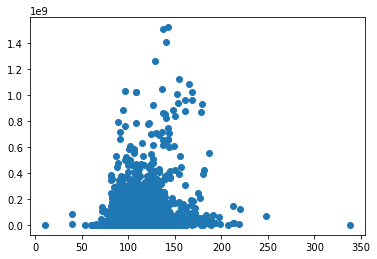

In [17]:
plt.scatter(X.runtime,y.revenue)
#plt.scatter(X,y)

In [18]:
X = X_releasedate.reshape(-1, 1)
X[:5]

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [19]:
X.shape

(2986, 1)

In [20]:
y.shape

(2986, 1)

In [21]:
model = LinearRegression()
model


# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [22]:
# The slope
print(model.coef_)

[[1438564.52967034]]


In [23]:
# The y-intercept
print(model.intercept_)

[-88798928.25754252]


In [24]:
# The model creates predicted y values based on X values
predicted_y_values = model.predict(X)
print(X)
print(y)

      runtime
12       11.0
13       40.0
14       40.0
15       53.0
16       60.0
...       ...
2993    214.0
2994    219.0
2995    220.0
2996    248.0
2997    338.0

[2986 rows x 1 columns]
        revenue
12           97
13      7732325
14     87600000
15          500
16           60
...         ...
2993   12923936
2994    3484331
2995  122700000
2996   71000000
2997     871279

[2986 rows x 1 columns]


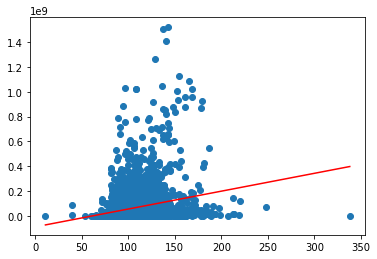

In [25]:
#Plot the results. The best fit line is red.
plt.scatter(X, y)
plt.plot(X,predicted_y_values,color='red')

In [26]:
X=y.drop('revenue',axis=1).copy()
# Splitting into Train and Test sets
#X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=1, stratify=y)
X_train,X_test,y_train,y_test = train_test_split(X, y,random_state=78)

In [27]:
X_test
y_train
y_test

X_train



""
2636
2644
2890
140
1195
...
2165
52
1955
482


In [32]:
X_releasedate['status'].describe()

count    2988.000000
mean        0.998661
std         0.036570
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: status, dtype: float64